# COLETANDO

In [0]:
#desconsiderar essa celula: usei o google colab 
from google.colab import files
uploaded = files.upload()

Saving twitter-archive-enhanced.csv to twitter-archive-enhanced.csv


In [0]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests as rq
import io
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [0]:
#df1
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [0]:
#df2
response = rq.get(url).content
image_predictions = pd.read_csv(io.StringIO(response.decode('utf-8') ) , sep='\t')

In [0]:
#baixar image_predictions.tsv
with open('image_predictions.tsv', 'w') as img:
  img.write(image_predictions.to_csv(sep='\t') )#tsv 

files.download('image_predictions.tsv')  

In [0]:

consumer_key = '3cg2q2k1W5fps2ThXzh9yhPKK'
consumer_secret = 'LaA8SzgUNGpDbY5tYnqTb7Xi4ATBdj288NEPfTLNeb2c7G4wkI'
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [0]:
for id in list(twitter_archive_enhanced.tweet_id):
  try:
    tweet = api.get_status( id,tweet_mode='extended')
    with open('tweet_json.txt','a') as outfile:
      json.dump(tweet._json, outfile)
      outfile.write('\n')

  except Exception as e:
    pass
      

In [0]:
#desconsiderar essa celula: usei o google colab 
# files.download('tweet_json.txt') 
uploaded = files.upload()

Saving tweet_json.csv to tweet_json.csv


In [0]:

with open('tweet_json.txt') as f:
  content = f.readlines()
  with open('tweet_json.csv','w') as outfile:
    outfile.write("tweet_id,retweet_count,favorite_count \n")
    for i in content:
      j = json.loads(i)
      outfile.write( str(j['id']) +',' + str(j['retweet_count']) + ',' + str(j['favorite_count']) + '\n')
  

In [0]:
#df3
tweet_json= pd.read_csv('tweet_json.csv')

In [0]:
#desconsiderar essa celula: usei o google colab 
#files.download('tweet_json.csv')

# AVALIANDO

In [0]:
#------------------------------- DataFrame principal ------------------------------
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [0]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [0]:
#----------------------------- DataFrame das prediçoes das imagens--------------------------------
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [0]:
image_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [0]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [0]:
#-------------------------- DataFrame dos retweets e favorites---------------------------------- 
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.351000e+03,2351.000000,2351.000000
mean,7.428194e+17,2947.219056,8067.954913
std,6.887116e+16,4941.239058,12445.920897
min,6.660209e+17,0.000000,0.000000
25%,6.783846e+17,590.500000,1393.000000
50%,7.193395e+17,1383.000000,3493.000000
75%,7.993029e+17,3426.000000,9903.000000
max,8.924206e+17,83685.000000,164329.000000


In [0]:
tweet_json.duplicated().value_counts()

False    2340
True       11
dtype: int64

In [0]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id           2351 non-null int64
retweet_count      2351 non-null int64
favorite_count     2351 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Qualidade

### **twitter_archive_enhanced**
*coluna 'tweet_id' do tipo int*

*coluna 'in_reply_to_status_id' e  'in_reply_to_user_id' do tipo float ao inves de object*

*colunas com muitos NaNs, ex: 'in_reply_to_status_id'   e  'in_reply_to_user_id' *

*colunas inúteis para análises , ex: 'time_stamp ' , 'source'  e 'expanded_urls' *

*4 colunas para tipos de cachorro do tipo object poderiam ser bool *

### **image_predictions** 

*coluna 'tweet_id' do tipo int*

*coluna 'img_num' não tem sentido*


### **tweet_json**

*coluna 'tweet_id' é int ao inves de object*

## Arrumação

### **twitter_archive_enhanced**

*4 colunas para tipos de cachorro do tipo object poderiam ser uma só do tipo object idetificando o tipo do cahorro*


### **tweet_json**
*11 dados repetidos na coluna 'tweet_id'*

*colunas de contagem de favoritos e retweets poderiam estar na tabela twitter_archive_enhanced*


# LIMPANDO


In [0]:
twitter_arc = twitter_archive_enhanced.copy()
image_predict = image_predictions.copy()
tweet_j = tweet_json.copy()

## **twitter_archive_enhanced**

### define

***transformar o tipo int para string na coluna 'tweet_id'***

### code

In [0]:
#CODE
twitter_arc.tweet_id = twitter_arc.tweet_id.astype(str)

### test

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### define

***deletar colunas 'in_reply_to_status_id' e 'in_reply_to_user_id' ***

### code

In [0]:
twitter_arc.drop(columns=[ 'in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

### test

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 276.2+ KB


### define

***deletar colunas 'timestamp' e 'source'***

### code

In [0]:
twitter_arc.drop(columns=['timestamp','source'], inplace=True)

### test

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 239.4+ KB


### define

***deletar as colunas 'retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'expanded_urls' ***

### code

In [0]:
twitter_arc.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], inplace=True)

### test

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(7)
memory usage: 165.7+ KB


### define

***trocar o tipo das colunas de tipo de cachorro para bool***

### code

In [0]:
twitter_arc.doggo.replace({'None':False, 'doggo': True} , inplace=True)


In [0]:
twitter_arc.floofer.replace({'None':False, 'floofer': True} , inplace=True)


In [0]:
twitter_arc.pupper.replace({'None':False, 'pupper': True} , inplace=True)


In [0]:
twitter_arc.puppo.replace({'None':False, 'puppo': True} , inplace=True)


### test

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
dtypes: bool(4), int64(2), object(3)
memory usage: 101.3+ KB


### define

***transformar as 4 colunas do tipo de cachorro em uma só com o nome 'dog_type'***

### code

In [0]:
def transform(row):
  if row['doggo']==True:
    return 'doggo'
  elif row['floofer']==True:
    return 'floofer'
  elif row['pupper']==True:
    return 'pupper'
  elif row['puppo']==True:
    return 'puppo'
  else:
    return 'None'
  

In [0]:
twitter_arc['dog_type'] = twitter_arc.apply(transform , axis=1)

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null bool
floofer               2356 non-null bool
pupper                2356 non-null bool
puppo                 2356 non-null bool
dog_type              2356 non-null object
dtypes: bool(4), int64(2), object(4)
memory usage: 119.7+ KB


In [0]:
twitter_arc.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)

### test

In [0]:
twitter_arc.dog_type.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_type, dtype: int64

In [0]:
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_type              2356 non-null object
dtypes: int64(2), object(4)
memory usage: 110.5+ KB


## image_predictions

### define

***transformar o tipo int para string na coluna 'tweet_id'***

### code

In [0]:
#CODE
image_predict.tweet_id = image_predict.tweet_id.astype(str)

### test

In [0]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### define

***deletar a colunar 'img_num'***

### code

In [0]:
image_predict.drop(columns='img_num', inplace=True)

### test

In [0]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


##tweet_json

### define

**transformar o tipo da coluna 'tweet_id' para str**

### code

In [0]:
#CODE
tweet_j.tweet_id = tweet_j.tweet_id.astype(str)

### test

In [0]:
tweet_j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 3 columns):
tweet_id           2351 non-null object
retweet_count      2351 non-null int64
favorite_count     2351 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### define

**deletar as linhas repetidas**



### code

In [0]:
tweet_j = tweet_j[ ~ tweet_j.tweet_id.duplicated() ]

### test

In [0]:
tweet_j.shape

(2340, 3)

# VISUALIZAÇÃO

In [0]:
result = pd.merge( twitter_arc, image_predict, on='tweet_id')


In [0]:
result.shape

(2075, 16)

In [0]:
result = result.merge(tweet_j, on='tweet_id')

In [0]:
result.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1986,667455448082227200,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,True,Irish_terrier,0.054933,True,Yorkshire_terrier,0.040576,True,60,192
1408,682393905736888321,This is Kreg. He's riding an invisible jet ski...,11,10,Kreg,None,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,vizsla,0.657275,True,paddle,0.090286,False,Rhodesian_ridgeback,0.048228,True,730,2352
631,773985732834758656,Meet Winnie. She just made awkward eye contact...,11,10,Winnie,pupper,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True,4221,11418
1857,669972011175813120,Here we see really big dog cuddling smaller do...,10,10,None,None,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False,167,453
1051,709901256215666688,WeRateDogs stickers are here and they're 12/10...,12,10,None,None,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False,105,706


### ***salvando o arquivo para csv***

In [0]:
#baixar o result.csv
with open('twitter_archive_master.csv','w') as f:
  f.write(result.to_csv(index=False))
  files.download('twitter_archive_master.csv') 

### cleaning and testing

In [0]:
#desconsiderar essa celula: usei o google colab 
from google.colab import files
uploaded = files.upload()

Saving twitter_archive_master.csv to twitter_archive_master (1).csv


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df= pd.read_csv('twitter_archive_master.csv')

In [0]:
df.columns

Index(['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name',
       'dog_type', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count '],
      dtype='object')

In [0]:
#transformar 'tweet_id' para str
df['tweet_id'] = df['tweet_id'].astype(str)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 18 columns):
tweet_id              2067 non-null object
text                  2067 non-null object
rating_numerator      2067 non-null int64
rating_denominator    2067 non-null int64
name                  2067 non-null object
dog_type              2067 non-null object
jpg_url               2067 non-null object
p1                    2067 non-null object
p1_conf               2067 non-null float64
p1_dog                2067 non-null bool
p2                    2067 non-null object
p2_conf               2067 non-null float64
p2_dog                2067 non-null bool
p3                    2067 non-null object
p3_conf               2067 non-null float64
p3_dog                2067 non-null bool
retweet_count         2067 non-null int64
favorite_count        2067 non-null int64
dtypes: bool(3), float64(3), int64(4), object(8)
memory usage: 248.4+ KB


In [0]:
#tirar o espaço na culuna 'favorite_count'
df.rename(columns = {'favorite_count ':'favorite_count '.rstrip() }, inplace = True)

In [0]:
df.sample()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1208,696894894812565505,These two pirates crashed their ship and don't...,9,10,None,None,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True,720,2445


### visualization 1

In [0]:
dist=df.dog_type.value_counts()
dist

None       1746
pupper      211
doggo        80
puppo        23
floofer       7
Name: dog_type, dtype: int64

***Podemos notar que o numero de dados faltantes para a coluna 'dog_type' é bem elevada, cerca de 1746 dados faltantes('None')***

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


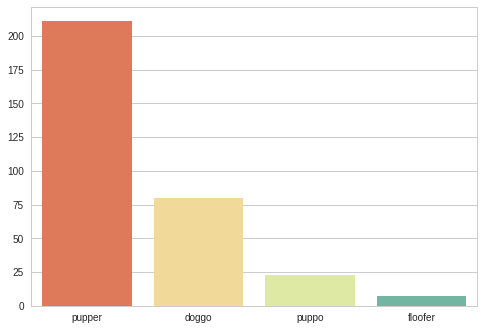

In [0]:
sns.set_style("whitegrid")
g = sns.barplot( dist[1:,].index, dist[1:,].values , palette='Spectral')

***OBS:Para efeito de melhor vizualicação foram tirados os dados faltantes***

### visualization 2

In [0]:
df.corr()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
rating_numerator,1.000000,0.198246,-0.009048,-0.028467,-0.020365,-0.033727,-0.003965,-0.028454,0.017308,0.016058
rating_denominator,0.198246,1.000000,-0.004390,0.000947,-0.034453,-0.000478,0.006843,0.005054,-0.021527,-0.025276
p1_conf,-0.009048,-0.004390,1.000000,0.116037,-0.511543,0.130954,-0.709292,0.107180,0.048456,0.069571
p1_dog,-0.028467,0.000947,0.116037,1.000000,0.113709,0.634862,0.050904,0.555815,0.006293,0.046508
p2_conf,-0.020365,-0.034453,-0.511543,0.113709,1.000000,0.102348,0.479283,0.067940,-0.007769,-0.018659
p2_dog,-0.033727,-0.000478,0.130954,0.634862,0.102348,1.000000,0.044589,0.551661,0.018293,0.054381
p3_conf,-0.003965,0.006843,-0.709292,0.050904,0.479283,0.044589,1.000000,0.044058,-0.034883,-0.049098
p3_dog,-0.028454,0.005054,0.107180,0.555815,0.067940,0.551661,0.044058,1.000000,0.000781,0.039626
retweet_count,0.017308,-0.021527,0.048456,0.006293,-0.007769,0.018293,-0.034883,0.000781,1.000000,0.856690
favorite_count,0.016058,-0.025276,0.069571,0.046508,-0.018659,0.054381,-0.049098,0.039626,0.856690,1.000000


***Aqui podemos notar que existe uma correlação forte ( corr = 0.86 ) entre o numero de curtidas e de retweets.  
O que sugere que o numero de curtidas cresce ao crescer o numero de retweets e vice-versa.***

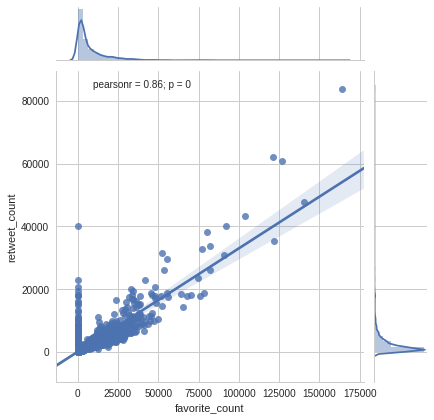

In [0]:
sns.jointplot(x='favorite_count' , y= 'retweet_count', data=df, kind='reg')

***A tedencia percebida em forma de coluna com muitos retweets e nenhuma curtida pode nos informar algum erro de qualidade (falta de dados das curtidas), pois sabemos que um post com 20.000 rewteets, por exemplo, é bem improvável que não tenha nenhuma curtida***

### visualization 3

***O cachorro com o maior numero de 'rating_numerator'***

In [0]:
from PIL import Image
import requests
from io import BytesIO

In [0]:
#lista decrescente do 'rating_numerator'
first=list(df.rating_numerator.sort_values(ascending=False))

In [0]:
#exemplo para pegar só o url: indice=1
df[df.rating_numerator==first[0]].jpg_url.__str__().split()

['797',
 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg',
 'Name:',
 'jpg_url,',
 'dtype:',
 'object']

In [0]:
#pegar a imagem pela url

aux=df[df.rating_numerator==first[0]]

response = requests.get( aux.jpg_url.__str__().split()[1] )
img = Image.open(BytesIO(response.content))

In [0]:
#dicionario com as informaçoes do cachorro com maior rating_numerator
first_dog= {'nome':aux.name.values[0],   
        'numerador': aux.rating_numerator.values[0],
        'retweets': aux.retweet_count.values[0],
        'curtidas': aux.favorite_count.values[0],
        'imagem': img
       }

In [0]:
print(first_dog)

{'nome': 'Atticus', 'numerador': 1776, 'retweets': 2637, 'curtidas': 5379, 'imagem': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=371x479 at 0x7F815DB2ED30>}


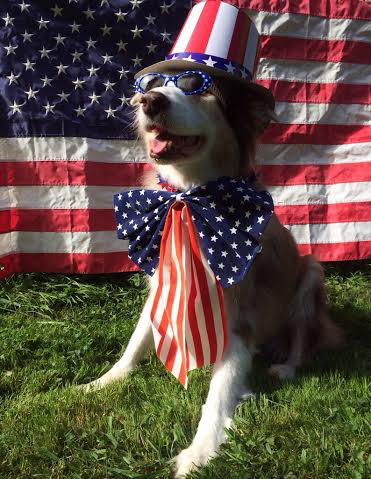

In [0]:
first_dog['imagem']

### visualization 4

***Post com o cachorro mais popular, considerando a soma de retweets e curtidas***

In [0]:
#nova coluna da soma
df['rt_plus_like']=(df.retweet_count+df.favorite_count)

In [0]:
df.sample()

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rt_plus_like
1672,673612854080196609,This is Jeffri. He's a speckled ice pupper. Ve...,7,10,Jeffri,pupper,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,Newfoundland,0.223101,True,Leonberg,0.111106,True,shovel,0.085626,False,742,1614,2356


In [0]:
popular=df[df.rt_plus_like == df['rt_plus_like'].max()]
popular

,tweet_id,text,rating_numerator,rating_denominator,name,dog_type,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rt_plus_like
846,744234799360020481,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,83685,164329,248014


In [0]:
#podemos chutar que ele é um labrador retriever pela alta confiança no 'p1_conf'
popular_dog= {
        'raça': popular.p1.values[0],
        'tipo':popular.dog_type.values[0],
        'numerador': popular.rating_numerator.values[0],
        'retweets': popular.retweet_count.values[0],
        'curtidas': popular.favorite_count.values[0],
        'probabilidade': popular.p1_conf.values[0]*100
       }

In [0]:
print(popular_dog)

{'raça': 'Labrador_retriever', 'tipo': 'doggo', 'numerador': 13, 'retweets': 83685, 'curtidas': 164329, 'probabilidade': 82.5333}


### visualization 5

***Algumas médias importantes***

In [0]:
describe=df.describe().copy()

In [0]:
describe.drop(columns=['p1_conf','p2_conf','p3_conf','rt_plus_like'], inplace=True)

In [0]:
d=describe[describe.index=='mean']
d=d.transpose()
d

,mean
rating_numerator,12.264151
rating_denominator,10.513304
retweet_count,2803.127238
favorite_count,8413.259313


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


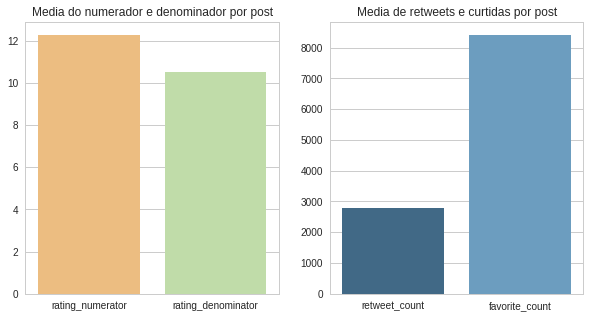

In [0]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2)

ax[0].set_title( "Media do numerador e denominador por post",   y = 1)
ax[1].set_title( "Media de retweets e curtidas por post",  y = 1)

sns.set_style("dark")
sns.barplot(  d[:2].index,  d[:2]['mean'].values , palette='Spectral', ax=ax[0])
sns.barplot( d[2:].index, d[2:]['mean'].values , palette='Blues_d', ax=ax[1])